# Business understanding
**The project details wth predicting the presence of heart disease based on**

# Data Understanding

In [1]:
import numpy as np 
import pandas as pd
import random
random.seed(4)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading of dataset
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: >

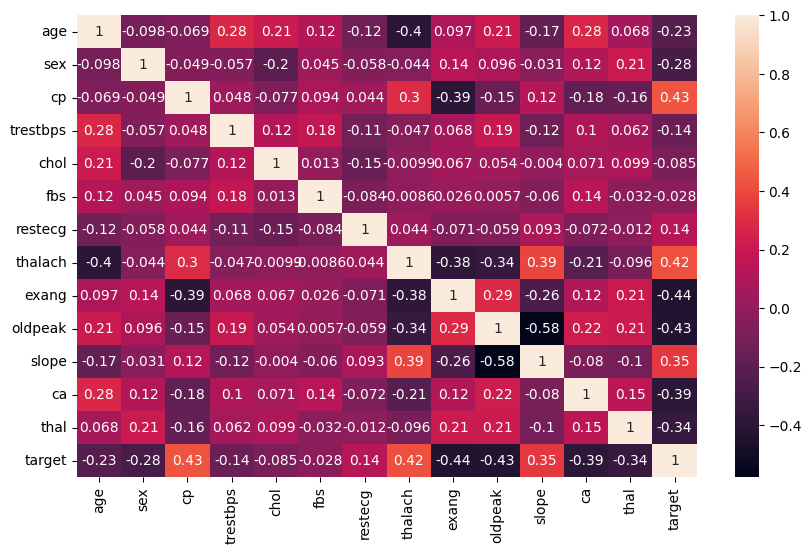

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

# Data Prepretion

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# checking for duplicates values 
df.duplicated().any()

np.True_

In [14]:
# dropping duplicates 
df = df.drop_duplicates()

In [15]:
# check agin whether duplicates are clear or not
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [16]:
# again check the shape
df.shape

(302, 14)

# Data Preprocessing

In [17]:
# dividing data into categorial and numerical values
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Feature scaling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [22]:
st

StandardScaler()

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


# Splitting dataset into training & testing set

In [24]:
# creatin independent variables
X = df.drop('target',axis = 1)

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.478910,-0.106449,0,1,-1.161988,1,-0.727060,1,0,3
299,-1.042904,1,3,-1.232023,0.338703,0,1,-0.768384,0,0.135360,1,0,3
300,1.503322,1,0,0.707035,-1.035462,1,1,-0.374779,0,2.032684,1,2,3
301,0.285561,1,0,-0.091401,-2.235438,0,1,-1.511859,1,0.135360,1,1,3


In [26]:
y = df['target']

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

In [29]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-1.375021,1,1,-0.661712,0.938690,0,1,0.543632,0,-0.899544,2,0,2
203,1.503322,1,2,2.760154,0.532247,1,0,0.018826,1,0.480328,1,0,3
197,1.392616,1,0,-0.376556,0.145158,1,1,0.587366,0,-0.727060,1,2,3
75,0.064151,0,1,0.193755,0.067741,0,0,0.499898,0,0.307844,1,0,2
177,1.060500,1,2,0.478910,1.712868,0,1,0.368697,0,-0.899544,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,0,-1.232023,-1.441906,0,0,0.368697,0,-0.899544,2,0,3
71,-0.378671,1,2,-2.144521,-0.377412,0,1,0.193761,1,-0.899544,2,1,3
106,1.614027,1,3,1.619532,-0.241930,1,0,-0.812118,0,-0.813302,1,1,2
271,0.728383,1,3,0.136724,-0.241930,0,1,-0.199843,0,1.342748,1,2,2


In [30]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [31]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,0.064151,1,0,0.022661,2.061248,0,1,-0.768384,1,0.135360,1,1,3
229,1.060500,1,2,-0.376556,1.209652,0,1,-0.812118,1,0.652812,1,0,3
111,0.285561,1,2,1.049221,-2.332210,1,1,1.024705,0,-0.727060,2,1,3
247,1.281911,1,1,1.619532,-0.009677,0,1,-1.293190,1,-0.899544,1,3,1
60,1.835438,0,2,-1.232023,0.358057,1,0,-0.855851,0,-0.899544,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0,0.478910,0.996754,0,1,-1.205722,1,2.722620,1,3,3
104,-0.489377,1,2,-0.148432,-0.977399,0,1,0.587366,0,-0.899544,2,0,2
300,1.503322,1,0,0.707035,-1.035462,1,1,-0.374779,0,2.032684,1,2,3
194,0.617678,1,2,0.478910,-1.190298,0,0,0.237495,0,1.687716,1,0,2


In [32]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

# EDA

In [33]:
# finding count of male and female in dataset
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

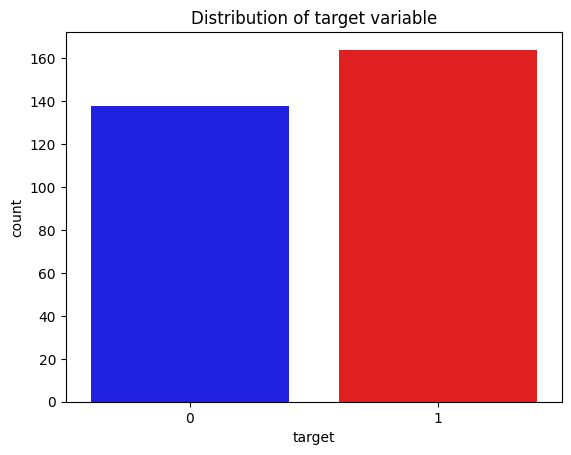

In [34]:
# potting target variable
sns.countplot(x = 'target', data =df,palette=['blue', 'red'])
plt.title('Distribution of target variable')
plt.show()

# Here 1 = heart disease present
#      0 = heart disease not present

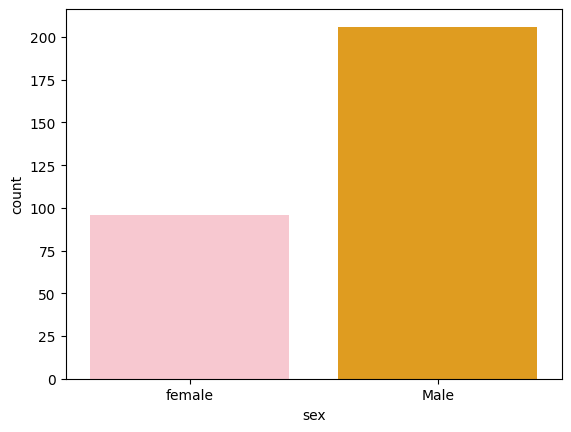

In [35]:
# visualizing the above data
sns.countplot(x = 'sex',data = df, palette=['pink', 'orange'])
plt.xticks([0,1],['female','Male'])
plt.show()

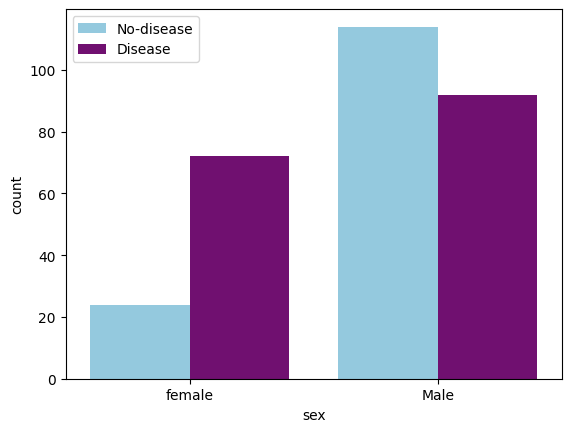

In [36]:
# gender distribution according to target variables
sns.countplot(x = 'sex',hue = 'target',data = df,palette=['skyblue', 'purple'])
plt.xticks([0,1],['female','Male'])
plt.legend(labels = ['No-disease','Disease'])
plt.show()

# Check chest pain type
**4 values (cp column)**

**0: typical angina**

**1: atypical angina**

**2: non-anginal pain**

**3: asymptomatic**

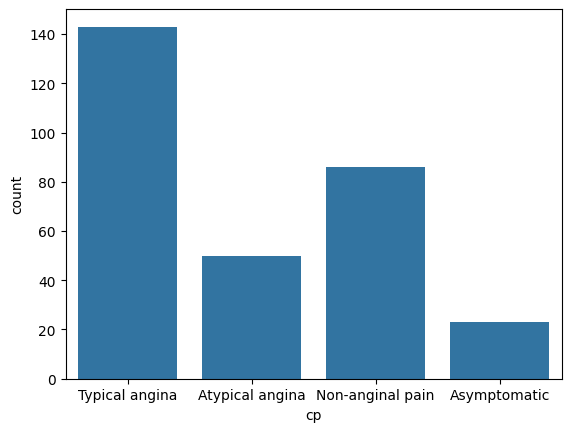

In [37]:
sns.countplot(x = 'cp',data=df)
plt.xticks([0,1,2,3],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'])
plt.show()

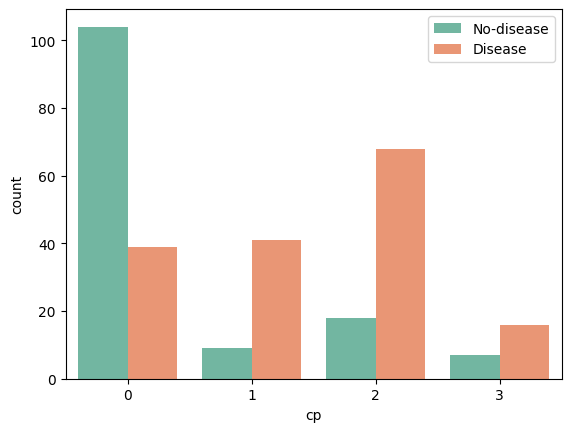

In [38]:
# chest pain distribution according to target variables
sns.countplot(x = 'cp',hue = 'target',data = df,palette = "Set2")
plt.legend(labels = ['No-disease','Disease'])
plt.show()

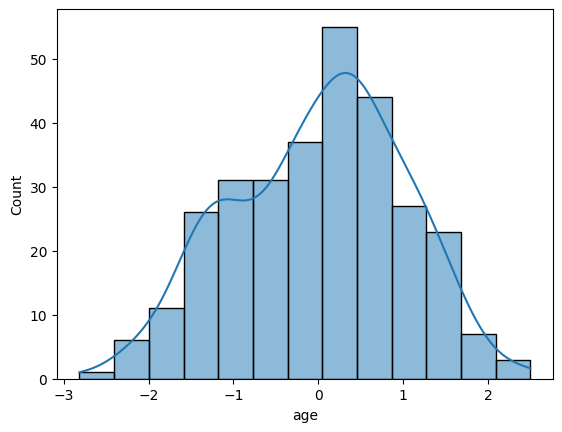

In [39]:
# Age distribution
sns.histplot(df['age'],kde = True)
plt.show()

# Model selection
**As per the above processing this is a classification problem. We have different classification model which can be used for further prediction**

**Here we will be using different classification models that we have studied and will be choosing model depending upon accuracy score**

# Using Logistic regression model

In [40]:
# logistic regression pipeline
log_reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])


In [41]:
log_reg_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [42]:
# train logistic regressin pipeline
log_reg_pipeline.fit(X_train,y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)

In [43]:
# calculate cross validate accuracy
cv_scores = cross_val_score(log_reg_pipeline,X,y,cv = 5,scoring = 'accuracy')
print("Cross validation accuracy score :",cv_scores)
print("Mean CV accuracy :",cv_scores.mean())

Cross validation accuracy score : [0.81967213 0.8852459  0.81666667 0.88333333 0.76666667]
Mean CV accuracy : 0.8343169398907104


In [44]:
# calculating confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_log_reg)
print("Confusion matrix :")
conf_matrix

Confusion matrix :


array([[24,  5],
       [ 6, 26]])

In [45]:
# Generating classification report
print("Logistic regression report")
print(classification_report(y_test,y_pred_log_reg))

Logistic regression report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Decision tree classifier

In [46]:
# Decision tree pipeline
tree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('decision tree', DecisionTreeClassifier())
    
])

In [47]:
tree_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('decision tree', DecisionTreeClassifier())])

In [48]:
# train decision tree pipeline
tree_pipeline.fit(X_train,y_train)
y_pred_tree = tree_pipeline.predict(X_test)

In [49]:
# Calculate cross validated acccuracy
cv_scores1 = cross_val_score(tree_pipeline,X,y,cv= 5,scoring = 'accuracy')
print("Cross validation accuracy score :",cv_scores1)
print("Mean CV accuracy :",cv_scores1.mean())

Cross validation accuracy score : [0.75409836 0.83606557 0.76666667 0.68333333 0.71666667]
Mean CV accuracy : 0.7513661202185793


In [50]:
# calculating confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_tree)
print("Confusion matrix :")
conf_matrix

Confusion matrix :


array([[26,  3],
       [ 9, 23]])

In [51]:
# generating classification report
print("Decision tree report :")
print(classification_report(y_test,y_pred_tree))

Decision tree report :
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



# Random forest classifier

In [52]:
# define random forest classifier
rf_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy ='mean')),
    ('random_forest',RandomForestClassifier())
])


In [53]:
rf_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('random_forest', RandomForestClassifier())])

In [54]:
# train the pipeline model
rf_pipeline.fit(X_train,y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [55]:
# Calculate cross validated acccuracy
cv_scores2 = cross_val_score(rf_pipeline,X,y,cv= 5,scoring = 'accuracy')
print("Cross validation accuracy score :",cv_scores2)
print("Mean CV accuracy :",cv_scores2.mean())

Cross validation accuracy score : [0.83606557 0.8852459  0.81666667 0.8        0.8       ]
Mean CV accuracy : 0.8275956284153004


In [56]:
# calculating confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_rf)
print("Confusion matrix :")
conf_matrix

Confusion matrix :


array([[25,  4],
       [ 4, 28]])

In [57]:
# generating classification report
print("Decision tree report :")
print(classification_report(y_test,y_pred_rf))

Decision tree report :
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# comparing above 3 modelson the basis of mean cv acccuracy 

In [58]:
# calculating the mean accuracy for each model
log_reg_mean = cv_scores.mean()
tree_mean = cv_scores1.mean()
rf_mean = cv_scores2.mean()

# print the accuracy of each model , formatted to 4 decimal places
print(f"Logistic Regression mean accuracy :{log_reg_mean:.4f}")
print(f"Decision Tree mean accuracy :{tree_mean:.4f}")
print(f"Random Forest mean accuracy :{rf_mean:.4f}")

Logistic Regression mean accuracy :0.8343
Decision Tree mean accuracy :0.7514
Random Forest mean accuracy :0.8276


**As per above comparision we choose logistic regression model**

In [59]:
lsr = LogisticRegression()
lsr.fit(X,y)

LogisticRegression()

**Prediction on new data**

In [60]:
new_data = pd.DataFrame({
    'age' : 52,
    'sex' : 1,
    'cp' : 0,
    'trestbps' : 125,
    'chol': 212,
    'fbs': 0,
    'restecg' : 1,
    'thalach' : 168,
    'exang' : 0,
    'oldpeak' : 1.0,
    'slope' : 2,
    'ca' : 2,
    'thal' : 3,
},index =[0])

In [61]:
new_data1 = pd.DataFrame({
    'age' : 63,
    'sex' : 1,
    'cp' : 3,
    'trestbps' : 145,
    'chol': 233,
    'fbs': 1,
    'restecg' : 0,
    'thalach' : 150,
    'exang' : 0,
    'oldpeak' : 2.3,
    'slope' : 0,
    'ca' : 0,
    'thal' : 1,
},index =[1])

In [62]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [63]:
new_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [64]:
p = lsr.predict(new_data)
print(p)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")

[1]
Disease


In [65]:
p = lsr.predict(new_data1)
print(p)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")

[0]
No Disease
